# Integration

We will cover four common numerical integration techniques:

1) **Trapezoidal Method**
2) **Simpson's Method**
3) **Gauss-Legendre Integration**
4) **Monte Carlo Integration**

Our main goal in these methods is to approximate an integral $ I $ by constructing a quadrature formula of the form:

$$
I \approx \sum w_i y_i
$$

where $ w_i $ are weights, and $ y_i$ are the function values at specific points. Each method achieves this with a different approach to choosing the weights and the points at which the function is evaluated.


In [16]:
def numeric_integral(w,y):
    suma=0
    for i in range(len(w)):
        suma+=w[i]*y[i]
    return suma

## Trapezoidal method

Suppose we have a function $ f(x) $, and we want to approximate the integral:

$$
\int_a^b f(x) \, dx
$$

The simplest approach is to divide the interval $[a, b]$ into $ N - 1 $ equal sub-intervals, where $ N $ is the number of points in the partition. Each sub-interval then has width:

$$
h = \frac{b - a}{N - 1}
$$

We approximate the function by connecting neighbouring $ f(x) $ values with straight lines, forming trapezoids.

<img src="trapez1.png" alt="Cubic spline" width="500" height="250"/>

For a single trapezoid formed between $ y_i $ and $ y_{i+1} $, its area is:

$$
s_i = \frac{y_{i+1} + y_i}{2} \cdot h
$$

<img src="trapez2.png" alt="Cubic spline" width="500" height="250"/>

Summing up the areas of all $ N - 1 $ trapezoids, we get:

$$
I \approx \sum_{i=1}^{N-1} s_i = \frac{h}{2} \left( y_1 + 2y_2 + 2y_3 + \dots + 2y_{N-1} + y_N \right)
$$
In compact notation, this can be expressed as:

$$
I \approx \sum_{i=1}^N w_i y_i
$$

where

$$
w_i = \frac{h}{2}  \begin{cases} 
1, & i = 1 \text{ or } i = N \\ 
2, & 1 < i < N 
\end{cases}
$$

### Error of trapezoidal method

<img src="trapez3.png" alt="Cubic spline" width="500" height="250"/>

For each trapezoid in the trapezoidal approximation, there is an associated error $ e_i $, given by:

$$
e_i = -\frac{h^3}{12} f''(\xi_i)
$$
where $ x_i \leq \xi_i \leq x_{i+1} $ for each $ i $. This error arises due to the approximation of $ f(x)$ by a straight line over each interval.


The total error $ E $ for the entire interval $[a, b]$ is the sum of the individual errors for each trapezoid:

$$
E = \sum_{i=1}^{N_T} e_i = -\frac{h^3}{12} \sum_{i=1}^{N_T} f''(\xi_i)
$$

where $ N_T = N - 1 $ represents the number of trapezoids. By expressing $ h $ in terms of $ N_T $:

$$
h = \frac{b - a}{N_T}
$$

we can rewrite the error as:

$$
E = -\frac{(b - a)^3}{12 N_T^3} \sum_{i=1}^{N_T} f''(\xi_i)
$$

Introducing the average value of $ f''(\xi) $ over the interval, denoted by $ \langle f''(\xi) \rangle $, the error simplifies to:

$$
E = -\frac{(b - a)^3}{12 N_T^2} \langle f''(\xi) \rangle
$$

In practice, we often estimate $ \langle f''(\xi) \rangle $ as the largest value of $ f''(x)$ over the interval $[a, b]$.

The trapezoidal method is exact for linear functions, as the error term $f''(\xi) $ vanishes when $ f(x) $ is linear.

In [89]:
def trapezoidal_weights(h:float, N:int):
    w=[h/2]
    for i in range(1,N-1):
        w.append(h)
    w.append(h/2)
    return w

#code for estimating error is trivial, you just need to compute second derivatives and at each point check if it is the biggest value

### Why trapezoidal method is awesome

- Trapezoid method can easily be used for non-evenly spaced numerical data.
- It is very easy to write in in higher dimensions

I will demonstrate integration on a real data example.

In [28]:
#this is p(T) from some lab I did
T = [295.15, 299.25, 303.25, 306.85, 310.75, 314.75, 318.55, 322.45, 326.45, 330.05, 333.55, 335.35] #K
p = [104.646, 130.646, 160.646, 194.646, 235.646, 285.646, 342.646, 407.646, 489.646, 573.646, 663.646, 726.646] #mmHg

def data_trapez(x,y):
    suma=0
    for i in range(len(x)-1):
        suma+=(y[i+1]+y[i])/2 * (x[i+1]-x[i])

    return suma

I=data_trapez(T,p)
print(I)

import numpy as np
integral_pT = np.trapz(p, T)
print(integral_pT)

13367.969200000016
13367.969200000016


## Simpson method

To improve accuracy, we can approximate $ f(x) $ using quadratic functions, rather than linear. For each quadratic approximation, we need three points. Since two points will always overlap in adjacent segments, this setup requires an **odd number of points** in the entire interval for integration.


<img src="simpson.png" alt="Cubic spline" width="500" height="250"/>

<img src="simpson2.png" alt="Cubic spline" width="500" height="250"/>

As with the trapezoidal method, we divide our interval $[a, b]$ into equal subintervals. However, each quadratic "packet" requires three points: $ x_1 $, $ x_2 $, and $ x_3 $. Using these points, we can interpolate a quadratic polynomial for $ f(x)$ over each segment using the **Lagrange interpolation formula**:

$$
p(x) = \frac{(x - x_2)(x - x_3)}{(x_1 - x_2)(x_1 - x_3)} y_1 + \frac{(x - x_1)(x - x_3)}{(x_2 - x_1)(x_3 - x_2)} y_2 + \frac{(x - x_1)(x - x_2)}{(x_3 - x_1)(x_3 - x_2)} y_3
$$

Recognize $ h = x_2 - x_1 = x_3 - x_2 $ and $ x_3 - x_1 = 2h $. Using these values, we find the integral of $ p(x) $ from $ x_1 $ to $ x_3 $:

$$
\int_{x_1}^{x_3} p(x) \, dx = \frac{h}{3} \left( f(x_1) + 4f(x_2) + f(x_3) \right)
$$
This is the area of one "packet" of three points. To find the total area, we sum over all such packets:

$$
I = \sum_{i=1}^{N/2} s_i = \frac{h}{3} \left( f(x_1) + 4f(x_2) + f(x_3) \right) + \frac{h}{3} \left( f(x_3) + 4f(x_4) + f(x_5) \right) + \dots
$$

This expression shows a clear pattern for the weights $ w_i $ in the final integral approximation:

$$
I = \sum_{i=1}^{N} w_i f(x_i)
$$

where:
$$
w_i =\frac{h}{3} \begin{cases} 
      1 & \text{if } i = 1 \text{ or } i = N, \\ 
      4 & \text{if } i \text{ is even}, \\
      2 & \text{if } i \text{ is odd (excluding endpoints)}. 
   \end{cases}
$$

The error in Simpson’s method for numerical integration is given by:
$$
E = -\frac{(b - a)^5}{90 N^4} \langle f^{(IV)}(\xi) \rangle
$$

In [55]:
def simpson_weights(h:float, N:int):
    w=[h/3]
    for i in range(1,N-1):
        if i%2==1:#we are python shifted here
            w.append(4*h/3)
        else:
            w.append(2*h/3)
    w.append(h/3)
    return w

In [91]:
#Example
from numpy import exp,sin, pi
f=lambda x: exp(x)*sin(x) #from 0 to pi

#Analytical solution
analytical=(exp(pi)+1)*0.5
print("Analytical solution is ",analytical)

x=[0,pi/4,pi/2,3*pi/4,pi]
y=[f(xi) for xi in x]
h=pi/4

#trapezoid
w_t=trapezoidal_weights(h,5)
print("Trapezoidal integral ", numeric_integral(w_t,y))
#simpson
w_s=simpson_weights(h,5)
print("Simpson integral ", numeric_integral(w_s,y))

Analytical solution is  12.070346316389633
Trapezoidal integral  10.855654911387282
Simpson integral  11.955446481799601


#### But the fun does not have to stop!

We can also use simpson method to integrate higher dimensions.

In [96]:
import numpy as np
#2D simpson

def simpson_matrix(N):
    weight=np.ones(N)
    weight[1:-1:2] = 4 
    weight[2:-1:2] = 2
    weight=np.outer(weight,weight)
    return weight

def two_simpson(f,a,b,N):
    dx=(b[0]-a[0])/(N-1)
    dy=(b[1]-a[1])/(N-1)
    x=np.linspace(a[0], b[0],N)
    y=np.linspace(a[1], b[1],N)
    
    S=simpson_matrix(N)

    X,Y=np.meshgrid(x,y)
    F=f(X,Y)
    integral=np.einsum("mn,mn->",S,F)
    return integral*dx*dy/9

def simpson_tensor(N):
    weight=np.ones(N)
    weight[1:-1:2] = 4 
    weight[2:-1:2] = 2
    weight= np.einsum('i,j,k->ijk', weight, weight,weight)
    return weight


def three_simpson(f,a,b,N):
    dx=(b[0]-a[0])/(N-1)
    dy=(b[1]-a[1])/(N-1)
    dz=(b[2]-a[2])/(N-1)
    x=np.linspace(a[0], b[0],N)
    y=np.linspace(a[1], b[1],N)
    z=np.linspace(a[2], b[2],N)
    
    S=simpson_tensor(N)

    X,Y,Z=np.meshgrid(x,y,z)
    F=f(X,Y,Z)
    integral=np.einsum("mnk,mnk->",S,F)
    return integral*dx*dy*dz/27

## Gauss-Legendre Quadrature

In many applications, using a higher precision quadrature method is essential for accurate results with a limited number of function evaluations. The **Gauss-Legendre quadrature** method is one such powerful technique.

### 2 points
We aim to approximate the integral with two points as:
$$
I=\int_{-1}^{1} f(x) \, dx \approx w_1 f(x_1) + w_2 f(x_2)
$$
where $ x_1 $ and $ x_2 $ are the points at which we evaluate $ f(x) $, and $ w_1 $ and $ w_2 $ are weights associated with each point.

Through two points $ (x_1, f(x_1)) $ and $(x_2, f(x_2)) $, we can construct a line:
$$
y = f(x_1) + \frac{f(x_2) - f(x_1)}{x_2 - x_1} \cdot (x - x_1)
$$

Now, we integrate this approximation from $-1$ to $1$:
$$
I=\int_{-1}^{1} y \, dx = \int_{-1}^{1} f(x_1) \, dx + \int_{-1}^{1} \frac{f(x_2) - f(x_1)}{x_2 - x_1} x \, dx - \int_{-1}^{1} \frac{f(x_2) - f(x_1)}{x_2 - x_1} x_1 \, dx
$$



After integrating each term and simplifying, we find:
$$
\int_{-1}^{1} y \, dx = \frac{2x_2}{x_2 - x_1} f(x_1) - \frac{2x_1}{x_2 - x_1} f(x_2)
$$

According to our requirement:
$$
\frac{2x_2}{x_2 - x_1} f(x_1) - \frac{2x_1}{x_2 - x_1} f(x_2) = w_1 f(x_1) + w_2 f(x_2)
$$

If we take $x_1=-1$ and $x_2=1$:
$$
w_1=\frac{2x_2}{x_2-x_1} = 1
$$
$$
w_2=\frac{-2x_1}{x_2-x_1} = 1
$$
Hence, $$I=f(-1)+f(1)$$

If we want to improve our approximation, we can choose two points, $ x_1 $ and $ x_2 $, that are not simply at the endpoints of the interval. By doing this, we can construct a **third-degree polynomial** approximation:

$$
p(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3
$$

We then require:
$$
\int_{-1}^{1} p(x) \, dx = w_1 f(x_1) + w_2 f(x_2)
$$

To determine these four parameters, we integrate:
$$
\int_{-1}^{1} a_0 + a_1 x + a_2 x^2 + a_3 x^3 \, dx
$$

Let us take each of the terms separately:
1. **Constant term, $ a_0 $:**
   $$
   \int_{-1}^{1} 1 \, dx = w_1 + w_2
  $$
   which simplifies to:
   $$
   w_1 + w_2 = 2
   $$
2. **Linear term, $a_1 x $:**
   $$
   \int_{-1}^{1} x \, dx = w_1 x_1 + w_2 x_2
   $$
   Since the integral of $ x $ over a symmetric interval around zero is zero, this gives:
   $$
   w_1 x_1 + w_2 x_2 = 0
   $$
3. **Quadratic term, $ a_2 x^2 $:**
   $$
   \int_{-1}^{1} x^2 \, dx = w_1 x_1^2 + w_2 x_2^2
   $$
   Since $ \int_{-1}^{1} x^2 \, dx = \frac{2}{3} $, we get:
   $$
   w_1 x_1^2 + w_2 x_2^2 = \frac{2}{3}
   $$
4. **Cubic term,$ a_3 x^3 $:**
   $$
   \int_{-1}^{1} x^3 \, dx = w_1 x_1^3 + w_2 x_2^3
   $$
   Since the integral of $ x^3 $ over a symmetric interval around zero is zero, we have:
   $$
   w_1 x_1^3 + w_2 x_2^3 = 0
   $$

We now have the following system:
$$
\begin{cases}
w_1 + w_2 = 2 \\
w_1 x_1 + w_2 x_2 = 0 \\
w_1 x_1^2 + w_2 x_2^2 = \frac{2}{3} \\
w_1 x_1^3 + w_2 x_2^3 = 0
\end{cases}
$$

From the second and fourth equations:
$$
w_1 x_1 + w_2 x_2 = 0 \quad \text{and} \quad w_1 x_1^3 + w_2 x_2^3 = 0
$$
we find that either $ x_1 = x_2 $ or $ x_1 = -x_2 $. Taking $ x_1 = x_2 $ would imply no difference between the two points, which would be illogical for quadrature. Therefore, we choose:
$$
x_1 = -x_2
$$

Using $ x_1 = -x_2 $ in the first equation:
$$
w_1 + w_2 = 2
$$
and the second equation:
$$
w_1 x_1 + w_2 x_2 = 0
$$
we conclude that:
$$
w_1 = w_2 = 1
$$

Substitute $ x_1 = -x_2 $ and $ w_1 = w_2 = 1 $ into the third equation:
$$
w_1 x_1^2 + w_2 x_2^2 = \frac{2}{3}
$$
which simplifies to:
$$
x_1^2 + x_2^2 = \frac{2}{3}
$$
Since $ x_1 = -x_2$, we have:
$$
2 x_1^2 = \frac{2}{3}
$$
or:
$$
x_1^2 = \frac{1}{3}
$$

The Gauss-Legendre quadrature points and weights for two-point quadrature are thus:
$$
x_1 = \sqrt{\frac{1}{3}}, \quad x_2 = -\sqrt{\frac{1}{3}}
$$
$$
w_1 = 1, \quad w_2 = 1
$$

### 3 points
Following an analogous procedure as with the two-point quadrature, for three points we obtain the following values:

- $ x_1 = -\sqrt{\frac{3}{5}} $, $ w_1 = \frac{5}{9} $
- $ x_2 = 0 $, $ w_2 = \frac{8}{9} $
- $ x_3 = \sqrt{\frac{3}{5}} $, $ w_3 = \frac{5}{9} $


### General Gauss-Legendre Quadrature
For $ n $ points, the integration points $ x_i $ are given by the roots of the $ n $-th Legendre polynomial $ L_n(x) $ over the interval $ [-1, 1] $. The Legendre polynomial $L_n(x) $ can be defined as:
$$
L_n(x) = \frac{1}{2^n \, n!} \frac{d^n}{dx^n} \left[(x^2 - 1)^n\right]
$$
for $ n = 0, 1, 2, \dots $ and $ -1 \leq x \leq 1$.<p></p>
The weights $ w_i$ associated with each point $ x_i $ are given by:
$$
w_i = \frac{2}{\left(1 - x_i^2\right) \left[L'_n(x_i)\right]^2}
$$



### Interval mapping

Gauss-Legendre quadrature is typically defined for integrals over the interval $[-1, 1]$. However, if we need to compute an integral over an arbitrary interval $[a, b]$, we can apply a change of variables to map the interval $[-1, 1]$ to $[a, b]$.

To translate and stretch $[-1, 1]$ to $[a, b]$, we use the following transformation:
$$
t = \frac{a + b}{2} + \frac{b - a}{2} \, x
$$
where:
-$ t $ is the new variable over the interval $[a, b]$,
- $ x $ is the original variable in the interval $[-1, 1]$.

Given the integral over $[a, b]$:
$$
\int_a^b f(t) \, dt
$$
we substitute $ t = \frac{a + b}{2} + \frac{b - a}{2} \, x $ and compute $ dt $ as:
$$
dt = \frac{b - a}{2} \, dx
$$
This transforms the integral into:
$$
\int_a^b f(t) \, dt = \int_{-1}^1 f\left(\frac{a + b}{2} + \frac{b - a}{2} \, x\right) \frac{b - a}{2} \, dx
$$
$$
\int_a^b f(t) \, dt \approx \sum_{i=1}^N w_i \, f\left(\frac{a + b}{2} + \frac{b - a}{2} \, x_i\right) \cdot \frac{b - a}{2}
$$

In [ ]:
#We could look up a table to get Gauss-Legendre weights and then simply integrate at a wanted order, but where is the fun in that?
#Legendre polynomials can be expressed recursively, which just screams programming
def legendre_polynomial(x, n):
    if n==0: return 1;
    elif n==1: return x;
    else:
        return 1/n *( (2*n-1)*x*legendre_polynomial(x, n-1) - (n-1)*legendre_polynomial(x, n-2) )

#Oh and look at that, so can their derivatives
def legendre_polynomial_derivative(f,x,n): #f is here so that it can be used in general solver later
     if n==0: return 0;
     elif n==1: return 1;
     else:
         return (n*legendre_polynomial(x,n-1)-n*x*legendre_polynomial(x,n))/(1-x*x)

#Now why did we want derivatives? If you remember from lecture one, we need them in order to perform tangent method for root finding.
#First a quick reminder of tangent method, here called newton method, in a bit different form than before I must admit
def newton(function, derivative, x0 : float, ep : float=1e-9, *args):
    norm=2*ep;
    while abs(norm)>ep:
        xk:float = x0 - function(x0, *args)/derivative(function,x0, *args)
        norm=xk-x0;
        x0=xk;
    return x0;

#Now finally Legendre roots
def legendre_roots(n, tol:float=1e-9): 
    from math import cos,pi
    roots=[];
    for i in range(1,n+1): #n roots
        #root finding formula
        x=cos(pi*((2*i-1)/(2*n)));
        root=newton(legendre_polynomial, legendre_polynomial_derivative, x,tol, n)
        similar_roots = [True for y in roots if abs(root - y) < tol]
        if not any(similar_roots):
            roots.append(root)
    return roots;

#Hokus pokus and we can obtain weights
def legendre_weights(n, roots=[]):
    if len(roots)==0:
        roots=legendre_roots(n);
    weights=[];
    for r in roots:
        dP=legendre_polynomial_derivative(0,r,n);
        w=2/( (1-r*r) * dP*dP)
        weights.append(w)
    return weights

# Let's not forget to map the interval
def map_interval(a,b,nodes,weights):
    mapped_nodes=[]
    mapped_w=[]
    for node in nodes:
        mapped_nodes.append((b-a)*0.5*node + (a+b)*0.5);
    for w in weights:
        mapped_w.append((b-a)*0.5*w); #from outside the sum
    return mapped_nodes,mapped_w

#and let us neatly pack all this into one function
def gauss_legendre(f,a,b,n=2):
    roots=legendre_roots(n);
    w=legendre_weights(n,roots);
    r,w=map_interval(a, b, roots, w)
    f_v=[];
    for i in r:
        f_v.append(f(i));
    return numeric_integral(w,f_v)

## Monte Carlo Integration

Monte Carlo integration offers a stochastic approach to estimating an integral. The idea is to approximate the integral by randomly sampling points in the integration interval, evaluating whether each point lies under the curve, and using these samples to approximate the area under the function.

##### Method Outline

1. **Define the Integration Rectangle:**  
   Construct a rectangle that encompasses the area under the function $ f(x) $ over the interval $[x_{\text{min}}, x_{\text{max}}]$. This rectangle has width $(x_{\text{max}} - x_{\text{min}})$ and height $(y_{\text{max}} - y_{\text{min}})$, where:
   - $ y_{\text{max}} $ is an upper bound for $ f(x) $ in the interval,
   - $ y_{\text{min}} $ is a lower bound (typically zero if $ f(x) \geq 0 $).

   The area of this rectangle, $ S $, is:
   $$
   S = (x_{\text{max}} - x_{\text{min}})(y_{\text{max}} - y_{\text{min}})
   $$

2. **Generate Random Points:**  
   Generate $ N $ random points $(x_i, y_i)$ uniformly distributed over the rectangle $ S $.

3. **Count Points Under the Curve:**  
   Let $ r $ represent the number of points that fall under the curve $ f(x) $, where $ y_i \leq f(x_i) $.

4. **Estimate the Integral:**  
   The fraction of points that lie under the curve, $ r$, approximates the ratio of the area under $f(x) $ to the area of the rectangle $ S $. Thus, the integral of $ f(x) $ over $[x_{\text{min}}, x_{\text{max}}]$can be estimated as:
   $$
   \int_{x_{\text{min}}}^{x_{\text{max}}} f(x) \, dx \approx S \cdot r
   $$

- **Pros:**  
  Monte Carlo integration is especially useful for multidimensional integrals where traditional quadrature methods become impractical.

- **Cons:**  
  This method is relatively inaccurate for single-variable functions, as it requires a very large number of random points to converge to an accurate estimate. Even with a large number of samples, the accuracy is generally lower than with deterministic methods like the trapezoidal or Simpson's rule.


(Note: In practical computations, computers generate **pseudorandom** numbers rather than truly random numbers. These numbers are generated by algorithms that produce sequences with statistical properties similar to true randomness, which is sufficient for most Monte Carlo integration applications.)

In [134]:
import random
def monte_carlo(f,x_min:list,x_max:list, N:int)->float:
    area=1
    hit=0
    for i in range(N):
        x=[]
        for i in range(len(x_min)):
            x.append(random.uniform(x_min[i],x_max[i]))
        if x[-1] <= f(*x[:-1]): #this is a neat little trick to unpack arguments because f is usually defined for variables, not for a vector
            hit+=1

    for i in range(len(x_min)):
        area*=(x_max[i]-x_min[i])
        
    return area*hit/N

In [140]:
#Example
from numpy import exp,sin, pi

print(monte_carlo(lambda x: exp(x)*sin(x), [0,0],[pi,8],1000))

11.460530000295565


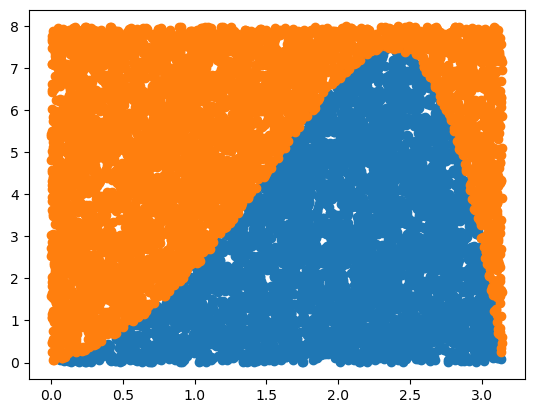

In [144]:
#A nice visual
import numpy as np
def monte_carlo2(f, a:float,b:float,ya:float,yb:float,N:int):
    hit=[]
    unhit=[]
    S=0 #inside circel
    for _ in range(N):
        # Generate a random point in the interval [a, b]
        x = np.random.uniform(a, b)
        y = np.random.uniform(ya, yb)
        if y<=f(x):
            S += 1
            hit.append((x,y))
        else:
            unhit.append((x,y))
    return (b-a)*(yb-ya)*S/N,hit,unhit
     
f=lambda x:np.exp(x)*np.sin(x)
mt,hit,unhit=monte_carlo2(f, 0, np.pi, 0, 8, 10000)
import matplotlib.pyplot as plt
hitx,hity=np.array(hit).T
unhitx,unhity=np.array(unhit).T

plt.plot(hitx,hity, "o")
plt.plot(unhitx,unhity, "o")